In [1]:
# NAME: CHANDAN KUMAR #
# PRN : 230940141004 #

In [2]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-

IRIS

In [3]:
###------------------
### Import statements
###------------------

import sys
import os
from time import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [4]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join( 'Input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('Output')



## DataSet
[Reference](http://roycekimmons.com/tools/generated_data/exams)

To understand the influence of the parents background, test preparation, etc. machine learning/iris.csv

In [5]:
#csv file name
iris_file =os.path.join(inpDir,moduleDir,'iris.csv')
#define feature name
iris_features =['sepal length',
                'sepal width',
                'petal length',
                'petal width',
                'target']
iris_df=pd.read_csv(iris_file, sep=',', skiprows=1,header=None, names = iris_features)

iris_df.head() 

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


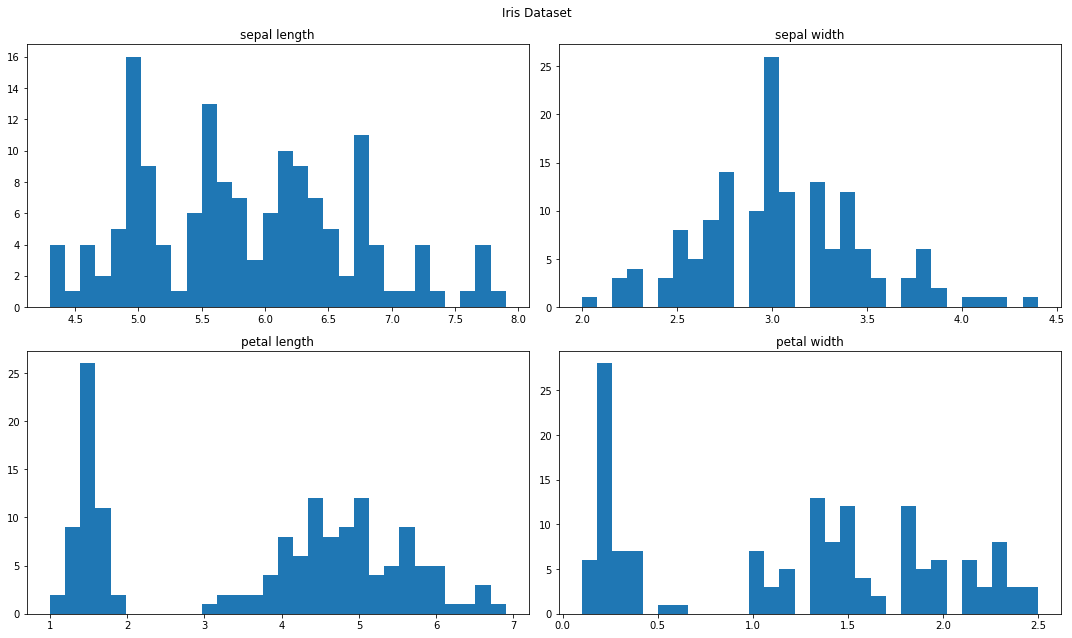

In [6]:
#Plot the  features
fig=plt.figure(figsize =(15, 9) )
fig.suptitle('Iris Dataset')

for count, col in enumerate(iris_df.columns[:-1]):
    
    #add the first set of asxes(subplot 1)
    ax= fig.add_subplot(2,2,count+1) #2 row 2 column
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    n,bins, patches= ax.hist(iris_df[col], 30)
    ax.set_title('{}'.format(iris_df.columns[count]))
    ax.axis('tight')
    
plt.tight_layout()
plt.show()

In [7]:
#Feature Extraction

In [8]:
features_df = iris_df.drop('target',axis =1)  #features column
labels_df = iris_df['target']#labels

In [9]:
features_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
labels_df.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [11]:
##function to calculate Mean, Srandard Deviation

def fn_calc_mu_std(df): #'''Args: df: dataframe'''
    mu={} #dictionary to hold sigma
    std_dev={}#min value of the col
    min_val={}
    max_val={}
    
    for col in df.columns:
        mu[col] =df[col].mean()
        std_dev[col]= df[col].std()
        min_val[col]= df[col].min()
        max_val[col]= df[col].max()
        
    return mu,std_dev,min_val,max_val

In [12]:
# Some helpers to format the plot

target_names=['setos','versicolor','virginica']

#this formatter will lwvwl the colorbat with the correct target names
formatter = plt.FuncFormatter(lambda i, *args:target_names[int(i)])

#properties matplotin.patch.Patch
props=dict(boxstyle='round',facecolor='aqua',alpha=0.5)

In [13]:
features_df.iloc[-1]

sepal length    5.9
sepal width     3.0
petal length    5.1
petal width     1.8
Name: 149, dtype: float64

{'sepal length': 5.006, 'sepal width': 3.418, 'petal length': 1.464, 'petal width': 0.244} {'sepal length': 0.35248968721345136, 'sepal width': 0.38102439795469095, 'petal length': 0.17351115943644546, 'petal width': 0.1072095030816784} {'sepal length': 4.3, 'sepal width': 2.3, 'petal length': 1.0, 'petal width': 0.1} {'sepal length': 5.8, 'sepal width': 4.4, 'petal length': 1.9, 'petal width': 0.6}


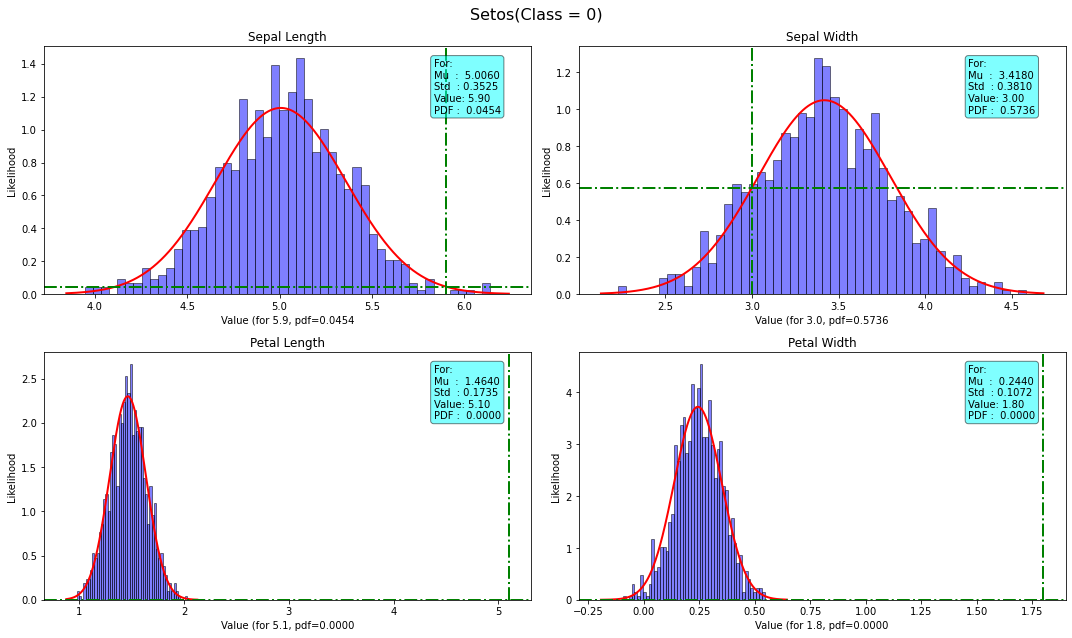

{'sepal length': 5.936, 'sepal width': 2.7700000000000005, 'petal length': 4.26, 'petal width': 1.3259999999999998} {'sepal length': 0.5161711470638634, 'sepal width': 0.3137983233784114, 'petal length': 0.46991097723995795, 'petal width': 0.19775268000454405} {'sepal length': 4.9, 'sepal width': 2.0, 'petal length': 3.0, 'petal width': 1.0} {'sepal length': 7.0, 'sepal width': 3.4, 'petal length': 5.1, 'petal width': 1.8}


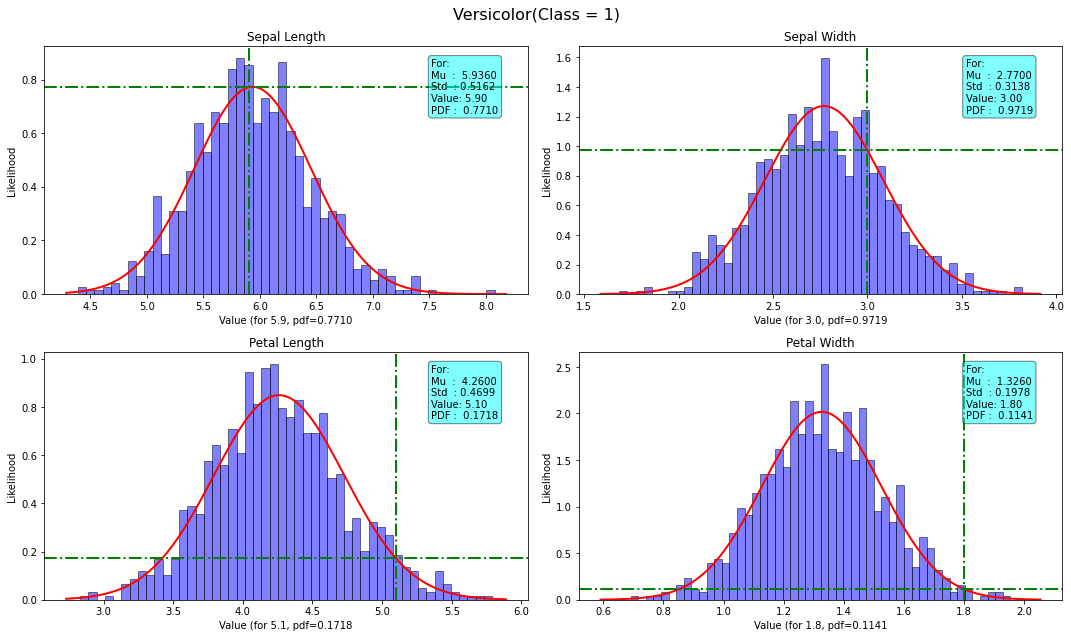

{'sepal length': 6.587999999999998, 'sepal width': 2.974, 'petal length': 5.5520000000000005, 'petal width': 2.0260000000000002} {'sepal length': 0.6358795932744322, 'sepal width': 0.32249663817263746, 'petal length': 0.5518946956639834, 'petal width': 0.2746500556366674} {'sepal length': 4.9, 'sepal width': 2.2, 'petal length': 4.5, 'petal width': 1.4} {'sepal length': 7.9, 'sepal width': 3.8, 'petal length': 6.9, 'petal width': 2.5}


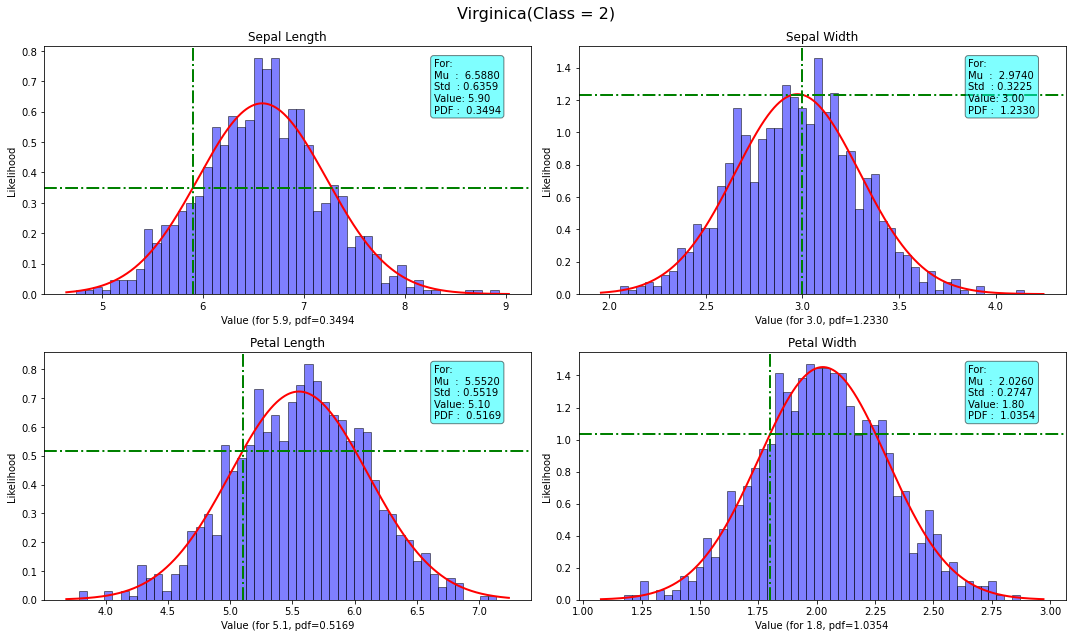

In [14]:
pdf_label={}

for lbl in iris_df['target'].unique(): #iterate over unique values of the target 
    label = target_names[lbl] #get names as a string 
    tmp_df=iris_df[iris_df['target']==lbl] #dataframe with one class
    tmp_df=tmp_df.drop('target',axis=1) #Remove 'Target' column
    mu, std_dev, min_val, max_val = fn_calc_mu_std(tmp_df) #call fn using this imp df
    print (mu, std_dev, min_val, max_val)
    fig, axes = plt.subplots(2,2, figsize =(15,9)) #plotting is always a good idea!
    fig.suptitle(f'{label.title()}(Class ={lbl:2d})', fontsize=16) #title of the figure
    
    nSample=1000 #Number of x values for prob. dit. function
    pdf_col={} # collect prob. dist. func. for each of the col
    
    for count, col in enumerate(tmp_df.columns):
       # print('Label',label,count)
        ax=axes.ravel()[count]
        meanVal= mu[col]
        stdDev= std_dev[col]
        minVal= min_val[col]
        maxVal=max_val[col]
        data = np.random.normal(meanVal, stdDev, nSample)
        
        ax.hist(data, bins=50, density=True, alpha=0.5, color='b', edgecolor='k')
        x =np.linspace(data.min()-0.1, data.max()+0.1,nSample)
        pdf= norm.pdf(x, meanVal, stdDev)
        ax.plot(x,pdf,'r',lw=2)
        
        val= features_df.iloc[-1][col]
        pdf_val= norm.pdf(val, meanVal, stdDev) #given the value what is the probability
        pdf_col[col]=pdf_val
        
        
        ax.axvline(x=val, color='g',linestyle='-.',linewidth=2)
        ax.axhline(y=pdf_val, color='g',linestyle='-.', linewidth=2)
        
        #little beautification
        fmtStr = "For:\nMu  : {:7.4f}\nStd  :{:7.4f}\nValue:{:5.2f}\nPDF : {:7.4f}"
        txtstr=fmtStr.format(meanVal, stdDev, val, pdf_val) #text to plot
        #place a text box in upper left in axes coords
        
        ax.text(0.8,0.95,txtstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
        
        
        ax.set_title(col.title())
        ax.set_xlabel(f"Value (for {val}, pdf={pdf_val:0.4f}")
        ax.set_ylabel("Likelihood")
    pdf_label[label]=pdf_col
    plt.tight_layout()
    plt.savefig(os.path.join(outDir,f'gaussian_iris_{label}.png'))
    plt.show()
        
        
    

In [15]:
y_pred =[]

for k,val_lbl in pdf_label.items():
    prob=1
    for k_col, val_col in val_lbl.items():
        prob *=val_col
    y_pred.append(prob)
    print(f'For Label: {k:11s}; likelihood : {prob:0.4f}')
    
y_pred=[v/sum(y_pred) for v in y_pred]

print(f'\nProbabilities : {y_pred}')

For Label: setos      ; likelihood : 0.0000
For Label: versicolor ; likelihood : 0.0147
For Label: virginica  ; likelihood : 0.2306

Probabilities : [7.265276020022551e-142, 0.05987903023763665, 0.9401209697623634]


In [16]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
iris_df.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## using SKlearn

In [18]:
#Make Predictions using Gaussian Navie Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
#Instantiate
clf = GaussianNB()
#fit the Classifier
clf.fit(features_df,labels_df)

#make predictions
y_pred =clf.predict(features_df)



In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
labels= labels_df.to_numpy()  #Create a matrix for labels

#Let's use first two columns of the data and plot the data to visualize the results
xplot =iris_df.keys()[0]

yplot =iris_df.keys()[1]

#also locate instances which are incorrectly predicated.

x_err =iris_df[xplot][(labels != y_pred)]

y_err =iris_df[yplot][(labels != y_pred)]